**Descripción del proyecto**

La tienda online Ice, especializada en venta de videojuegos alrededor del mundo, necesita saber que factores influyen en el éxito de un videojuego para planificar la campana publicitaria del año 2017.

**Descripción de las columnas**

- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Rating (Clasificación ESRB)

Nota: Es posible que los datos de 2016 estén incompletos.

## Inicialización: Importar librerías


Antes de comenzar, se cargan las librerías pandas, numpy, scipy y matplotlib.

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar los datos: lectura de los archivos csv

Los datos provienen del dataframe que se carga a continuación.

In [2]:
df = pd.read_csv('/datasets/games.csv')

## Descripción de los datos

A continuación se revisará el dataframe inicial, haciendo correcciones de ste si se considera necesario como parte del preprocesamiento de datos. Para comenzar, se usarán los métodos info.() y describe.() junto con la impresión de una muestra del dataframe. Dichos elementos entregarán un buen resumen del dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Tenemos 16715 entradas distribuidas en 11 columnas. 
Las columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating contienen valores ausentes.
Todas las columnas deberían ser pasadas a minúsculas.

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


La columna User_Score debería ser un tipo de dato de coma flotante.
Las columna Year_of_Release debería ser un número entero.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


El año de lanzamiento de los juegos va desde el año 1980 hasta el 2016.
Las ventas para Norteamérica, Europa y Japón comienzan en 0, y sería relevante revisar más adelante si esto corresponde a valores atípicos.
El puntaje de la crítica está entre 13 y 98, alcanzando una media de 68.

## Preprocesamiento de  datos

### Nombres de las columnas

Los nombres de las columnas estarán en minúscula, para comprobar el éxito de dicha operación, se imprimirá una pequeña muestra del dataframe.

In [6]:
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Datos ausentes y conversión de tipos de datos

Primero conoceremos la cantidad de datos ausentes para cada columna, y qué porcentaje del dataframe representan.

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
nan_percentage = (df.isna().sum() / len(df)) * 100
nan_percentage

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

El nombre y el género tienen solo un 0.01% de datos ausentes, por lo que serán simplemente eliminados del dataframe.
El año de lanzamiento tiene un 1.6% de datos ausentes.
Las columnas user_score y rating tienen un 40% de datos ausentes.
La columna critc_score tiene un 51.3% de datos ausentes.


#### Datos ausentes: "name"

Vamos a localizar las columnas donde faltan el nombre y el género del juego, eliminarlas con el método dropna y resetear el índice.

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=['name'], axis=0)
df.reset_index(drop=True, inplace=True)

#### Datos ausentes: "year_of_release"

In [11]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Los datos ausentes para year_of_release se reemplazarán utilizando como referencia la media según la plataforma. Distintas consolas son lanzadas cada año por lo que tiene sentido que el dato que otorgue más información sobre la fecha de lanzamiento de un juego sea la plataforma en el que puede ser jugado.

In [12]:
df['year_of_release'] = df.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.mean()))

In [13]:
df['year_of_release'].isna().sum()

0

Finalmente, convertiremos estos datos de float a integer.

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [15]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Datos ausentes: "user_score"

Es probable que el puntaje de la crítica sea cercano al puntaje otorgado por los usuarios. Para verificar dicha proposición, se analizará la correlación entre ambas variables. Si la correlación se considera lo suficientemente alta. Sin embargo, para poder realizar esta operación, es necesario primero convertir lo tipos de datos. Además, en la columna user_score existen datos marcados como "tbd", del inglés to be announced, es decir, que próximamente se anunciará el puntaje, pero para efectos del análisis dichos datos siguen siendo datos ausentes, por lo que se convertirán a NaN antes de ser convertidos a float.

In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
df['critic_score'] = (df['critic_score'].astype(float))
df['user_score'] = df['user_score'].astype(float)

In [18]:
df['user_score'].corr(df['critic_score'])

0.5808778320767237

La correlación es de 0.5, lo suficientemente alta para rellenar los datos ausentes en critic_score usando como antecedente el puntaje en user_score, y viceversa. Como anteriormente se visualizó usando describe, la desviación estándar para critic_score está en alrededor de 13 puntos, por lo que se usará la mediana como medida de posición para rellenar los datos.

In [19]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [26]:
df['user_score'] = df.groupby('critic_score')['user_score'].apply(lambda x: x.fillna(x.median()))

In [27]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         8576
rating             6764
dtype: int64

Disminuyó la cantidad de valores ausentes pero se observa que los valores en critic_score no pudieron completar los valores de user_score en todos los casos, ya que dicha columna también tiene datos ausentes. Por ahora se dejará así el dataframe respecto a esta columna.

#### Datos ausentes: "critic_score"

Para rellenar los datos ausentes en critic_score se buscará el nombre del juego, ya que en las filas están descritos de acuerdo a su plataforma. A partir del nombre del juego, se imputará la mediana para rellenar los datos ausentes en critic_score, bajo el supuesto que el puntaje de la crítica no debieses variar según la plataforma de videojuego.

In [28]:
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))

In [29]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8576
rating             6764
dtype: int64

#### Datos ausentes: "rating"

Se usará la misma técnica anterior para rellenar datos ausentes en el rating, pero como la clasificación no corresponde a un valor número, se usará como medida de posición la moda.

In [66]:
df['rating'] = df.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()))

In [68]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8576
rating             8049
dtype: int64

**NOTA**
No se ha logrado rellenar todos los datos ausentes, pero es importante recordar que el dataframe contiene información desde la década de los 80' que probablemente es difícil de recuperar, y que para efectos de análisis en publicidad difícilmente tiene relevancia en el 2016.

Finalmente, crearemos una nueva columna que agrupe las ventas totales de un videojuego, es decir, que sume las ventas de Norteamérica, Europa, Japón y otras ventas.

In [55]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Tiempo de vida útil en el mercado de una consola

In [47]:
df_platform_lifespan = df[df['year_of_release'] >= 2000]
df_platform_years = df_platform_lifespan.groupby(['platform', 'year_of_release']).size().unstack(fill_value=0)
df_platform_years

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,0,0,0,0,0,0,0,0,0,0,0,116,93,99,80,86,46
DC,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
DS,0,0,0,0,23,118,201,376,522,403,323,153,23,8,0,0,0
GB,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GBA,1,107,198,161,175,135,39,6,0,0,0,0,0,0,0,0,0
GC,0,22,152,158,83,97,40,4,0,0,0,0,0,0,0,0,0
N64,60,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PC,7,15,19,33,30,37,52,62,93,107,90,139,61,38,47,50,54
PS,160,91,20,3,0,0,0,0,0,0,0,0,0,0,0,0,0


La vida promedio de una plataforma es de cinco años, ya que esa es la cantidad de años en que una plataforma, en promedio, lanza más de cientos de títulos al mercado.

## Análisis Exploratorio de Datos

### Cantidad de juegos lanzados por años

El análisis comenzará analizando cuántos juegos son lanzados por año, considerando todas las plataformas. Para visualizar mejor está información, se construirá un histograma.

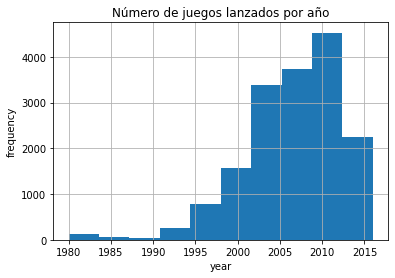

In [35]:
df.hist('year_of_release')
plt.title('Número de juegos lanzados por año')
plt.xlabel('year')
plt.ylabel('frequency');

La mayoría de los juegos fueron lanzados entre el año 2003 y 2013. La cantidad de juegos lanzados antes de los 2000 no es muy significativa, y habla del desarollo de la industria de los videojuegos en el siglo XXI. Se observa también una caída en el número de juegos lanzados a partir del año 2013, que se mantiene hasta el 2016. Seguramente esto habla de una estapa que está atravesando la industria actualmente.

Para conocer la cantidad de ventas que tiene cada plataforma se construirá un gráfico de barras, que permitirá identificar fácilmente que plataformas generan más ventas.

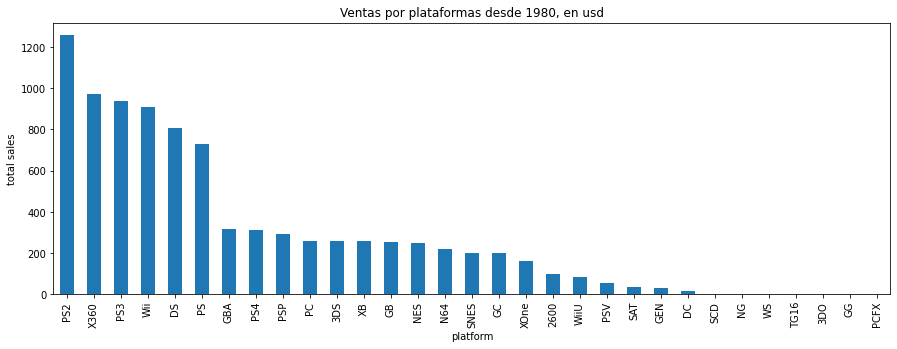

In [57]:
plt.figure(figsize=(15,5))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas por plataformas desde 1980, en usd')
plt.ylabel('total sales');

Se observan que las plataformas con más ventas son PS2, X360, PS3, Wii, DS y PS.

Con esta información, reduciremos el dataframe para construir un modelo que sirva para analizar la industria de los videojuegos en el año 2017. Como se observó anteriormente, desde ese año se observa una caída en el volumen de títulos lanzados por año y representa el momento actual de la industria.

In [49]:
df_final = df[df['year_of_release'] >= 2013]
df_final.shape

(2242, 11)

### Cantidad de juegos lanzados por años

A continuación volveremos a analizar las ventas por plataforma para identificar aquellas que son líderes en ventas, utilizando el dataframe recienmente creado.

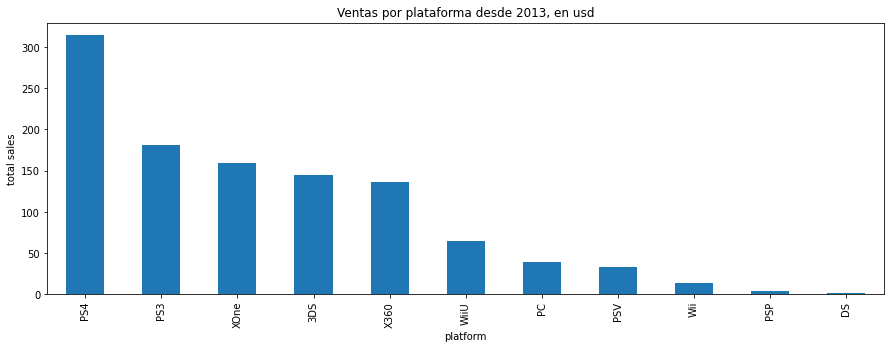

In [61]:
plt.figure(figsize=(15,5))
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas por plataforma desde 2013, en usd')
plt.ylabel('total sales');

Las cinco plataformas líderes en el periodo del 2013 al 2016 son PS4, PS3, XOne, 3DS y X360. Para continuar el análisis, solo nos concentraremos en estas, ya que han las líderes en el mercado desde el año 2013. Por lo tanto, crearemos un nuevo dataframe que incluya solo dichas plataformas desde el año 2013.

In [62]:
df_top_platforms = df_final[df_final['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
df_top_platforms.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Para enriquecer el análisis, se construirán diagramas de cajas para visualizar las ventas de todos los años, organizadas por plataforma.

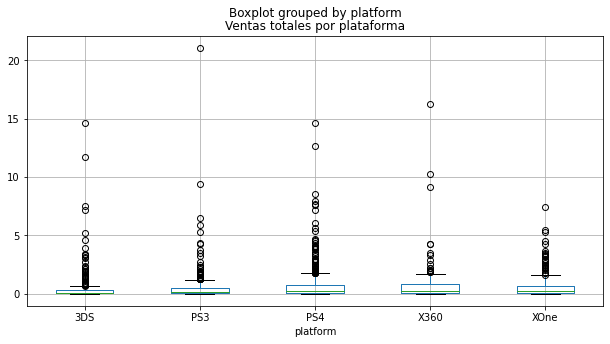

In [63]:
df_top_platforms.boxplot(by='platform', column='total_sales')
plt.title('Ventas totales por plataforma')
plt.gcf().set_size_inches(10, 5);

Todas las plataformas se ven similares, a simple vista, por lo que se calcurá la media y la mediana de ventas para cada una.

In [64]:
df_top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['median','mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.090,0.464437
PS3,0.150,0.525884
PS4,0.200,0.801378
X360,0.265,0.735484
XOne,0.220,0.645020


La media tiende a ser muchísimo mayor que la mediana, por lo que se puede afirmar que las distribuciones de las ventas para las cinco plataformas tienen un sesgo positivo. A continuación, se analizará como afectan las reseñas, tanto de la crítica como de los usuarios a la ventas de la plataformas PS4. Se eligió dicha plataforma al ser la que tiene más ventas totales entre 2013 a 2016. Para analizar cómo una variable afectá a la otra, se construirán gráficos de dispersión y se calcular la correlación entre las variables.

In [65]:
ps4 = df_final[df_final['platform']=='PS4']
ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


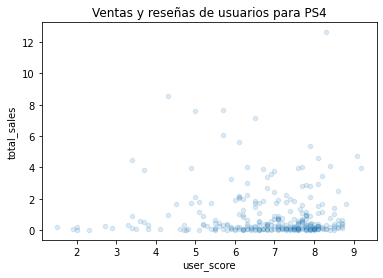

In [66]:
ps4.plot.scatter(y='total_sales', x='user_score', alpha=.15)
plt.title('Ventas y reseñas de usuarios para PS4');

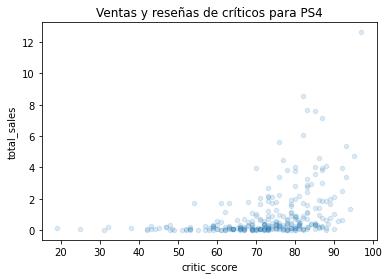

In [67]:
ps4.plot.scatter(y='total_sales', x='critic_score', alpha=.15)
plt.title('Ventas y reseñas de críticos para PS4');

In [68]:
corr_sales_critic_score= ps4['total_sales'].corr(ps4['critic_score'])
corr_sales_critic_score

0.39155120045082015

In [69]:
corr_sales_user_score= ps4['total_sales'].corr(ps4['user_score'])
corr_sales_user_score

-0.02744199377732555

La correlación entre las ventas y las reseñas de la crítica es de 0.4, mientras que la de las ventas y la reseña de los usuarios es de -0.03. Usando como referencias tanto los gráficos de dispersión y los coeficientes de correlación de Pearson se puede afirmar que no parece existir una correlación entre las reseñas de los usuarios y las ventas de la plataforma PS4, pero que si existe un correlación positiva entre el puntaje otorgada por la crítica y las ventas de juegos en la plataforma PS4, pero dicha correlación no es muy fuerte.

Ya se han analizado las plataformas, sin embargo, vale la pena también revisar cuáles son los títulos más vendidos y los géneros más populares en la industria de los videojuegos. Por lo tanto, a continuación se presentarán los 10 títulos con más ventas, y cómo cada uno de ellos vende en las cinco plataformas que fueron identificadas previamente como las más populares.

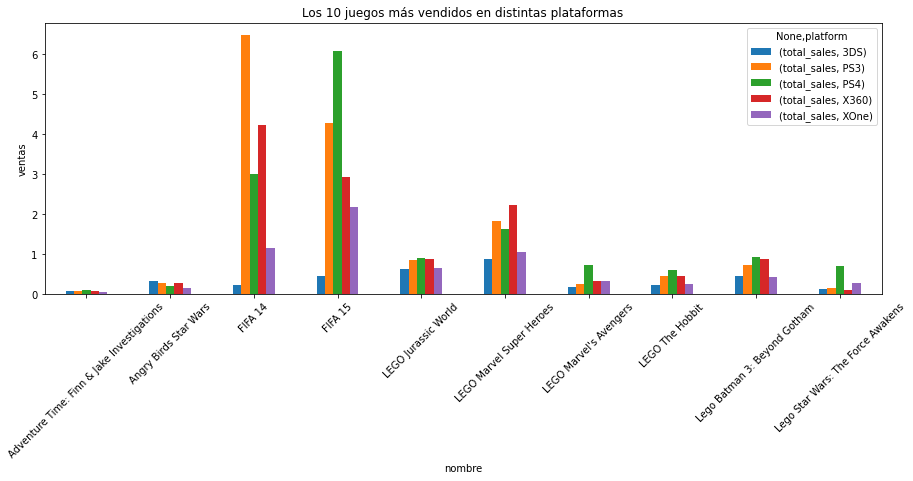

In [70]:
(df_top_platforms.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum')
                        .sort_values(by='total_sales', ascending=False).unstack(1).dropna()[:10].plot(kind='bar', figsize=(15,5)))
plt.title('Los 10 juegos más vendidos en distintas plataformas')
plt.xlabel('nombre')
plt.xticks(rotation=45)
plt.ylabel('ventas');

Los dos juegos más populares son FIFA14, que alcanza un peak de ventas en la consola PS3, y FIFA15, que alcanza un peak de ventas en la consola PS4. De estos datos, es importante notar que el desarrollo de los videojuegos debe ir en consonancia con el lanzamiento de nuevas consolas al mercado. A continuación, se analizará que géneros de juego son los que lanzan más títulos al mercado.

Text(0, 0.5, 'frecuencia')

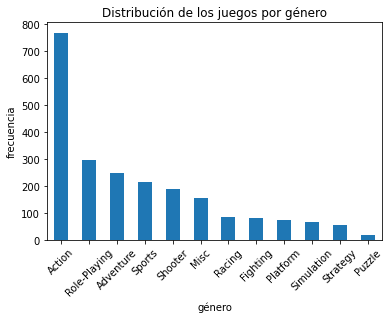

In [71]:
df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribución de los juegos por género')
plt.xlabel('género')
plt.xticks(rotation=45)
plt.ylabel('frecuencia')

Se observa que el género más desarrollado en cantidad de títulos es por lejos el de acción, seguido por el roleplay, los juegos de aventuras y los de deportes. A continuación analizaremos los géneros de los juegos desde el punto de vista de su rentabilidad.

Text(0, 0.5, 'ventas')

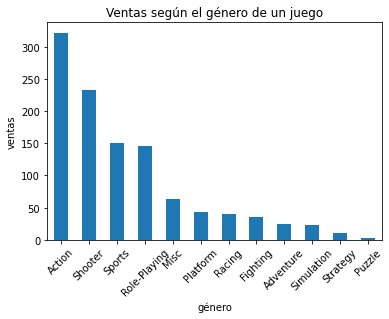

In [72]:
df_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas según el género de un juego')
plt.xlabel('género')
plt.xticks(rotation=45)
plt.ylabel('ventas')

No solo los juegos de acción son los que más se lanzan cada año, sino que también es el género más rentable. Como sorpresa, los juegos de tirador, que aparecían en quinto lugar en el gráfico anterior, son el segundo juego más rentable, seguido por el género de deportes. Por otra parte, los juegos de puzzle, estrategia y simulación parecen ser los menos rentables. A modo general, se podría afirmar que los juegos que generan cierta adrenalina en el usuario, ya sea desde el punto de la acción, el tiroteo o los deportes son más rentables que los juegos que no tienen dicho componente.

## Perfil de usuario para cada región

### Plataformas más populares por región

A continuación se describirán cuáles son las cinco plataformas principales en cada región (según su cantidad de ventas), y qué cuota del mercado concentran. El análisis se llevará a cabo en el siguiente orden: Norteamérica, Europa y Japón.

In [73]:
na_top_platforms = df_final.pivot_table(index='platform', values='na_sales', aggfunc=['sum']).reset_index()
na_top_platforms.columns = ['platform','total_na_sales']
na_top_platforms['market_share'] = na_top_platforms['total_na_sales']/(na_top_platforms['total_na_sales']).sum()
na_top_platforms = na_top_platforms.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)
na_top_platforms

,platform,total_na_sales,market_share
0,PS4,108.74,0.247891
1,XOne,93.12,0.212283
2,X360,81.66,0.186158
3,PS3,63.50,0.144759
4,3DS,39.04,0.088998
5,WiiU,29.21,0.066589
6,PC,11.11,0.025327
7,Wii,6.56,0.014955
8,PSV,5.15,0.011740
9,DS,0.57,0.001299


Las cinco plataformas principales en Norteamérica son: PS4, XOne, X360, PS3 y 3DS. Casi un cuarto del mercado norteamericano está dominado por la plataforma Play Station 4.

In [74]:
eu_top_platforms = df_final.pivot_table(index='platform', values='eu_sales', aggfunc=['sum']).reset_index()
eu_top_platforms.columns = ['platform','total_eu_sales']
eu_top_platforms['market_share'] = eu_top_platforms['total_eu_sales']/(eu_top_platforms['total_eu_sales']).sum()
eu_top_platforms = eu_top_platforms.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)
eu_top_platforms

,platform,total_eu_sales,market_share
0,PS4,141.09,0.359474
1,PS3,67.81,0.172769
2,XOne,51.59,0.131443
3,X360,42.52,0.108334
4,3DS,31.17,0.079416
5,PC,25.36,0.064613
6,WiiU,19.85,0.050575
7,PSV,6.15,0.015669
8,Wii,5.93,0.015109
9,DS,0.85,0.002166


Las cinco plataformas principales en Europa son PS4, PS3, XOne, X360 y 3DS. Se observa un perfil de usuario similar al de Norteamérica en este sentido, donde nuevamente PS4 se posiciona en el primer lugar con una cuota del 35% dentro del mercado europeo.

In [75]:
jp_top_platforms = df_final.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
jp_top_platforms.columns = ['platform','total_jp_sales']
jp_top_platforms['market_share'] = jp_top_platforms['total_jp_sales']/(jp_top_platforms['total_jp_sales']).sum()
jp_top_platforms = jp_top_platforms.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)
jp_top_platforms

,platform,total_jp_sales,market_share
0,3DS,67.86,0.481618
1,PS3,23.35,0.165720
2,PSV,18.66,0.132434
3,PS4,15.96,0.113272
4,WiiU,10.88,0.077218
5,PSP,3.29,0.023350
6,X360,0.51,0.003620
7,XOne,0.34,0.002413
8,Wii,0.05,0.000355
9,DS,0.00,0.000000


Las cinco plataformas principales en Japón son 3DS, PS3, PSV, PS4, WiiU. Se nota una gran diferencia del perfil de usuario de Japón en comparación al de Norteamérica y Europa. La popularidad de Nintendo 3DS es tal que domina casi la mitad del mercado japonés, lo cual tiene sentido ya que este es el país de origen de dicha consola.

### Géneros más populares por región

In [76]:
na_top_genres = df_final.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()
na_top_genres.columns = ['genre','total_na_sales']
na_top_genres['market_share'] = na_top_genres['total_na_sales']/(na_top_genres['total_na_sales']).sum()
na_top_genres = na_top_genres.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)
na_top_genres

,genre,total_na_sales,market_share
0,Action,126.23,0.287763
1,Shooter,109.78,0.250262
2,Sports,65.27,0.148794
3,Role-Playing,46.51,0.106027
4,Misc,27.49,0.062668
5,Platform,18.14,0.041353
6,Fighting,15.55,0.035449
7,Racing,13.04,0.029727
8,Adventure,7.22,0.016459
9,Simulation,5.32,0.012128


Los cinco géneros más populares en Norteamérica son: acción, tirador, deportes, role-play y misceláneo. Los juegos de tirador tienen casi un 30% de la cuota del mercado norteamericano.

In [77]:
eu_top_genres = df_final.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()
eu_top_genres.columns = ['genre','total_eu_sales']
eu_top_genres['market_share'] = eu_top_genres['total_eu_sales']/(eu_top_genres['total_eu_sales']).sum()
eu_top_genres = eu_top_genres.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)
eu_top_genres

,genre,total_eu_sales,market_share
0,Action,118.32,0.301460
1,Shooter,87.88,0.223904
2,Sports,60.52,0.154195
3,Role-Playing,37.02,0.094321
4,Racing,20.19,0.051441
5,Misc,20.04,0.051059
6,Platform,15.58,0.039695
7,Simulation,10.92,0.027822
8,Fighting,8.55,0.021784
9,Adventure,8.25,0.021020


Los géneros más populares en Europa son: acción, tirador, deportes, role-play y carreras. Nuevamente se observa una presencia del 30% de los juegos de tirador dentro del mercado europeo.

In [78]:
jp_top_genres = df_final.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()
jp_top_genres.columns = ['genre','total_jp_sales']
jp_top_genres['market_share'] = jp_top_genres['total_jp_sales']/(jp_top_genres['total_jp_sales']).sum()
jp_top_genres = jp_top_genres.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)
jp_top_genres

,genre,total_jp_sales,market_share
0,Role-Playing,51.14,0.362952
1,Action,40.49,0.287367
2,Misc,9.20,0.065295
3,Fighting,7.65,0.054294
4,Shooter,6.61,0.046913
5,Adventure,5.82,0.041306
6,Sports,5.43,0.038538
7,Platform,4.79,0.033996
8,Simulation,4.52,0.032079
9,Racing,2.30,0.016324


Nuevamente el perfil del jugador japonés se aleja del perfil de Norteamérica y Europa. En este caso, los cinco géneros más populares son el role-play, acción, misceláneo, peleas y tirador. Los juegos de role-play tienen en el público japonés un 36% del mercado.

### Clasificaciones de los juegos por región 

In [79]:
na_ratings = df_final.pivot_table(index='rating', values='na_sales', aggfunc=['sum']).reset_index()
na_ratings.columns = ['rating','total_na_sales']
na_ratings['market_share'] = na_ratings['total_na_sales']/(na_ratings['total_na_sales']).sum()
na_ratings = na_ratings.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)
na_ratings

,rating,total_na_sales,market_share
0,M,165.21,0.473435
1,E,79.17,0.226874
2,E10+,54.50,0.156178
3,T,50.08,0.143512


Casi la mitad de los juegos más vendidos en Norteamérica tiene una clasificación M, es decir "mature", o con un público de 17 o más años. Esto se condice con sus juegos más populares que al ser de acción y tirador, tienden a tener una clasificación para una audencia más mayor al poder contener escenas de violencia y/o sangre, junto con un lenguaje más fuerte.

In [80]:
eu_ratings = df_final.pivot_table(index='rating', values='eu_sales', aggfunc=['sum']).reset_index()
eu_ratings.columns = ['rating','total_eu_sales']
eu_ratings['market_share'] = eu_ratings['total_eu_sales']/(eu_ratings['total_eu_sales']).sum()
eu_ratings = eu_ratings.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)
eu_ratings

,rating,total_eu_sales,market_share
0,M,145.32,0.463422
1,E,83.38,0.265897
2,E10+,42.88,0.136743
3,T,42.00,0.133937


Una vez más el público europeo se asemeja al norteamericano, con un 46% del mercado concentrado en juegos con clasificación M. 

In [81]:
jp_ratings = df_final.pivot_table(index='rating', values='jp_sales', aggfunc=['sum']).reset_index()
jp_ratings.columns = ['rating','total_jp_sales']
jp_ratings['market_share'] = jp_ratings['total_jp_sales']/(jp_ratings['total_jp_sales']).sum()
jp_ratings = jp_ratings.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)
jp_ratings

,rating,total_jp_sales,market_share
0,T,20.66,0.370251
1,E,15.14,0.271326
2,M,14.11,0.252867
3,E10+,5.89,0.105556


Se observa una diferencia en el público japonés, donde los juegos con clasificación T, es decir, "teen", de 13 o más años, son aquellos que tienen más ventas dentro del mercado japonés, con un 36%.

Para resumir el perfil de usuario de cada región se puede afirmar que:
    a) El perfil de jugador norteamerican y europeo es muy similar, ambas audiencias prefieren los juegos para PS4, de acción y con clasificación M.
    b) El perfil del jugado japonés se caracteriza por preferir los juegos para 3DS, de roles y con una clasificación T.

## Pruebas de hipótesis

###  Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son las mismas

Para comenzar las pruebas de hipótesis estadística, primero hay que formular las hipótesis nula y alternativa, junto con elegir un criterio para probar la hipótesis.

* H0: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son iguales. 
* H1: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC no son iguales.
* Se establece un nivel de confianza del 95%, es decir, un valor de alpha de 0.05.

Se usará el paquete scipy.stats para probar la hipótesis de que las medias de dos poblaciones estadísticamente distintas son iguales. 

In [50]:
sample_1 = df_final[df_final['platform'] == 'XOne'].dropna()['user_score']
sample_2 = df_final[df_final['platform'] == 'PC'].dropna()['user_score']

In [51]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=10.922756330514147, pvalue=0.0010679702702186807)

El valor de p es muy bajo, por lo que probablemente las varianzas de ambas poblaciones no son iguales, por lo que el parámetro equal_var tomará el valor "False".

In [52]:
alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Se rechaza la hipótesis nula")
else:
        print("No se rechaza la hipótesis nula")

p-value:  0.13560857921068775
No se rechaza la hipótesis nula


La prueba estadística arrojó un valor de que no nos permite rechazar la hipótesis nula. Por lo tanto, no se puede afirmar con suficiente significancia estadística que las calificaciones promedio de los usuarios para las plataformas XboxOne y PC sean iguales o distintas. 

### Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes

* H0: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son iguales.
* H1: Las calificaciones promedio de los usuarios para los géneros de acción y deportes no son iguales.
* Se establece un nivel de confianza del 95%, es decir, un valor de alpha de 0.05.

In [54]:
sample_3 = df_final[df_final['genre'] == 'Action'].dropna()['user_score']
sample_4 = df_final[df_final['genre'] == 'Sports'].dropna()['user_score']

In [56]:
st.levene(sample_3, sample_4)

LeveneResult(statistic=3.447941799781177, pvalue=0.06404583457791355)

El valor de p es muy bajo, por lo que probablemente las varianzas de ambas poblaciones no son iguales, por lo que el parámetro equal_var tomará el valor "False".

In [57]:
alpha = 0.05 

results = st.ttest_ind(sample_3, sample_4,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Se rechaza la hipótesis nula")
else:
        print("No se rechaza la hipótesis nula")

p-value:  4.15962512188067e-13
Se rechaza la hipótesis nula


La prueba estadística arroja que se debe rechazar la hipótesis nula, y que por lo tanto efectivamente se observan diferencias entre las calificaciones promedio de los usuarios para los género de acción y deportes.

## Conclusiones

En el reporte se analizó la conducta de los jugadores en torno a los videojuegos para identificar patrones que puedan determinar el éxito o fracaso de un videojuego.
El análisis comenzó con la carga de las librerías pandas, numpy, scipy y matplotlib. Luego, se cargaron los datos a partir de la ruta '/datasets/games.csv' y con estos insumos comenzó el preprocesamiento de datos que incluyó convertir todos los nombres de las columnas a minúsculas, cambiar los tupos de variables y rellenar datos ausentes. No se logró rellenar todos los datos y se prefirió no forzar su imputación de datos para no distorsionar demasiado el dataframe original. Finalmente, se agregó una nueva columna que calcula las ventas totales.

Luego se desarrolló el análisis exploratorio de datos, que arrojo las siguientes conclusiones. En primer lugar, la mayoría de los juegos fueron lanzados entre el año 2003 y 2013. La cantidad de juegos lanzados antes de los 2000 no es muy significativa, y habla del desarollo de la industria de los videojuegos en el siglo XXI. Además, se observó mediante un gráfico que las plataformas con más ventas son PS2, X360, PS3, Wii, DS y PS. Se redujo el dataframe considerando los datos desde 2013 en adelante, ya que es la etapa en que comienzan a decar la cantidad de títulos lanzados, además, nos concentramos en las consolas líderes en venta en el período del 2013 al 2016 son PS4, PS3, XOne, 3DS y X360.

Usando gráficos de dispersión y el coeficiente de correlación de Pearson, se concluyó que no existe  una correlación entre las reseñas de los usuarios y las ventas de la plataforma PS4, pero que si existe un correlación positiva, pero débil, entre el puntaje otorgada por la crítica y las ventas de juegos en la plataforma PS4.

Respecto a los títulos más populares, ellos corresponden a FIFA14 y FIFA15. Pese a esto, los juegos de acción son los más populares, y también los más rentables, y a modo general, los juegos que requiere más acción rápida de parte del jugador como los de acción, tirador y deporter venden más que los juegos más lentos como los de puzzle o estrategia.

Posteriormente, se realizó un perfil de usuario para cada región que arrojó que el público norteamericano y europeo es similar, prefiriendo los juegos de acción y la consola PS4, y concentrandose en juegos con clasificación M (para público maduro), mientras que el público japonés prefiere los juegos de rol y la consola Nintendo 3DS, prefiriendo juegos con clasificación T (para adolescentes).

En último lugar, se llevaron a cabo dos pruebas de hipótesis. En el primer caso, se buscaba saber si las calificaciones promedio de los usuarios para las plataformas Xbox, One y PC son las mismas. La prueba estadística arrojó un valor de p que no nos permitía rechazar la hipótesis nula. Por lo tanto, no se puede afirmar con suficiente significancia estadística que las calificaciones promedio de los usuarios para las plataformas XboxOne y PC sean iguales o distintas. En el segundo caso, se buscaba saber si las calificaciones promedio de los usuarios para los géneros de Acción
y Deportes son diferentes. La prueba estadística arrojó que se debe rechazar la hipótesis nula, y que por lo tanto efectivamente se observan diferencias entre las calificaciones promedio de los usuarios para los género de acción y deportes.

Como conclusión final para el equipo de publicidad, se considera relevante concentrarse en una campaña para los juegos de acción en PS4, ya que son los más rentables dentro de la compañía Ice.